In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
prefix = '/Users/melawai.it/'

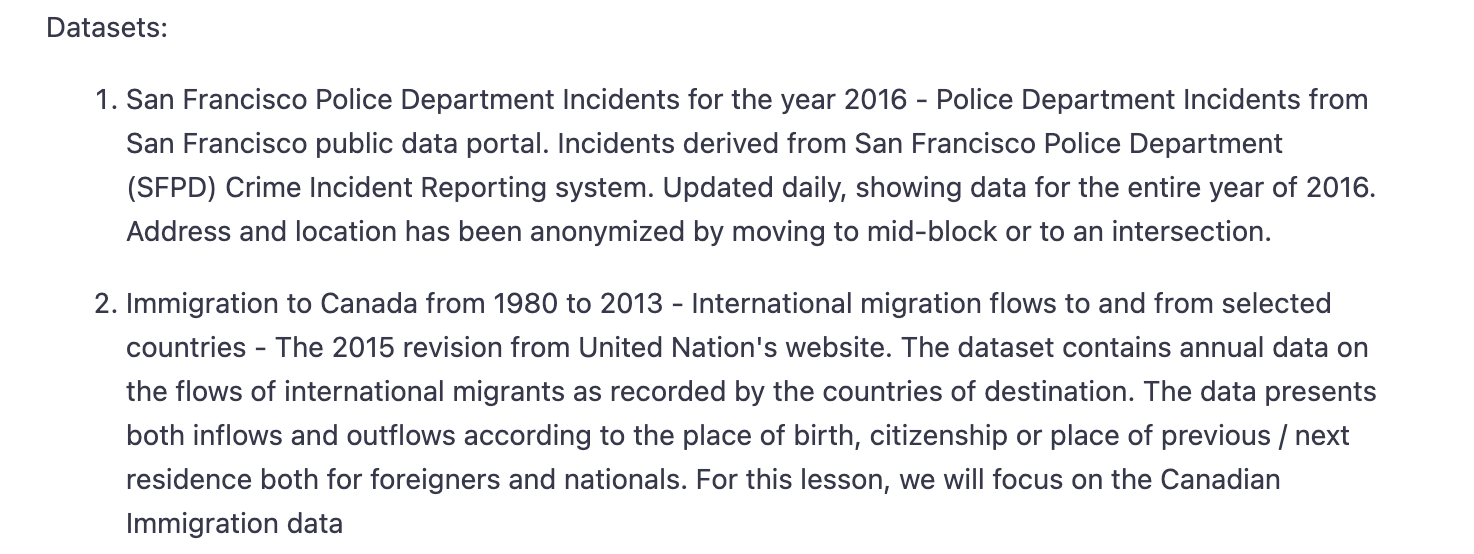

# Introduction to Folium

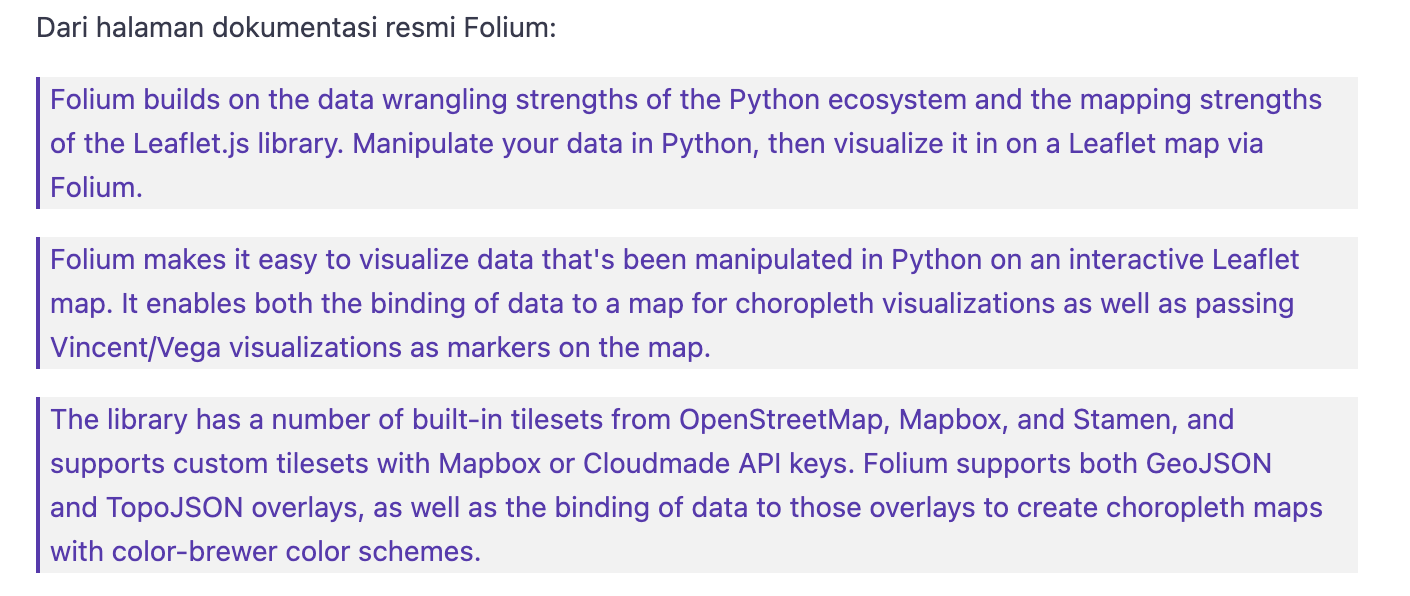

In [ ]:
!pip install folium

In [8]:
import folium

In [4]:
folium.__version__

'0.14.0'

In [7]:
world_map = folium.Map()

In [8]:
world_map

In [11]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=10)
world_map

## Stamen Toner Maps

In [12]:
world_map = folium.Map(
    location=[-6.992620, 110.428009], 
    zoom_start=13,
    tiles='Stamen Toner'
)
world_map

## Stamen Terrain Maps

In [13]:
world_map = folium.Map(
    location=[-6.992620, 110.428009], 
    zoom_start=13,
    tiles='Stamen Terrain'
)
world_map

# Maps with Markers

In [3]:
path_incidents = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/Police_Department_Incidents_-_Previous_Year__2016_.csv'

In [4]:
df_incidents = pd.read_csv(path_incidents)

In [16]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


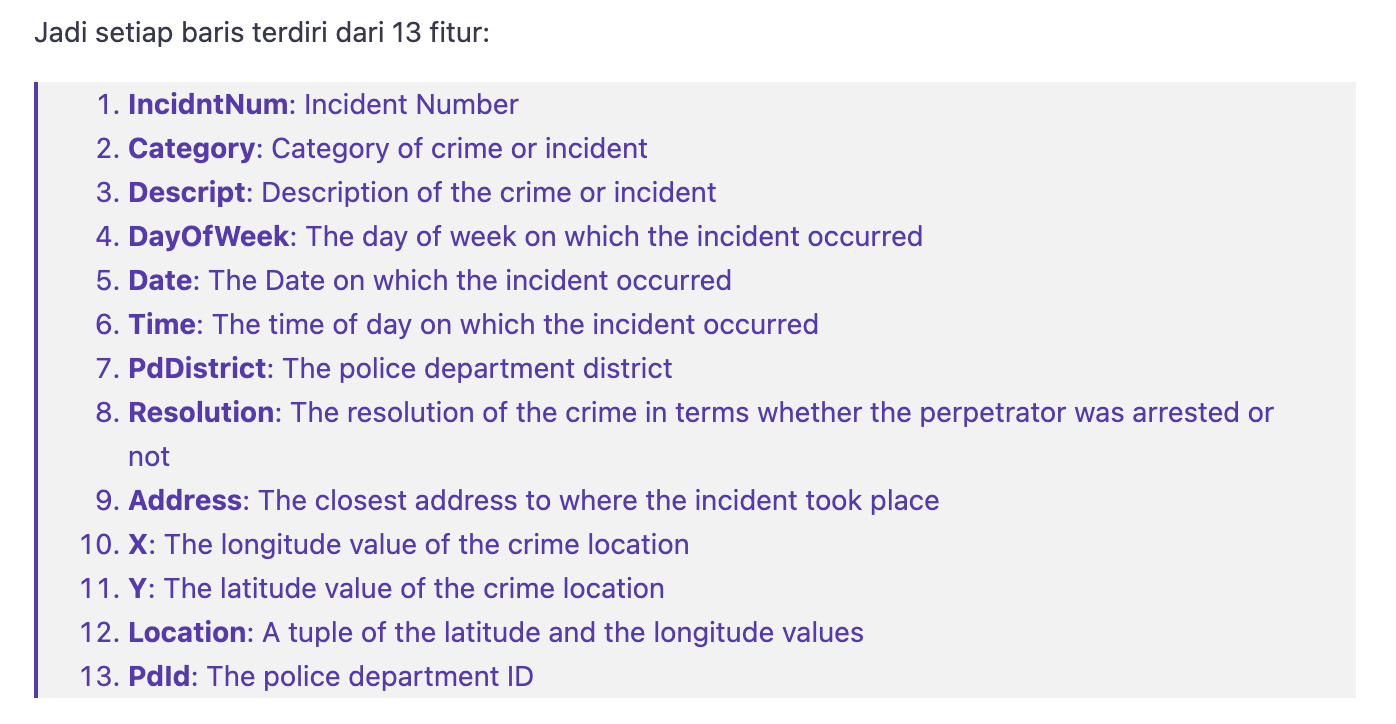

In [17]:
df_incidents.shape

(150500, 13)

In [5]:
limit = 100
df_incidents = df_incidents.iloc[:limit, :]

In [6]:
latitude = 37.77
longitude = -122.42

In [9]:
safran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
safran_map

In [20]:
incidents = folium.map.FeatureGroup()

In [22]:
for lat, lng in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='Yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=.6
        )
    )

In [23]:
safran_map.add_child(incidents)

In [24]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='Yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=.6
        )
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(safran_map)
    
safran_map.add_child(incidents)


In [25]:
safran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.CircleMarker(
        [lat, lng], 
        popup=label,
        radius=5,
        color='Yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=.6
    ).add_to(safran_map)
safran_map

In [10]:
from folium import plugins

safran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(safran_map)

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(incidents)
    
safran_map

# Choropleth Maps

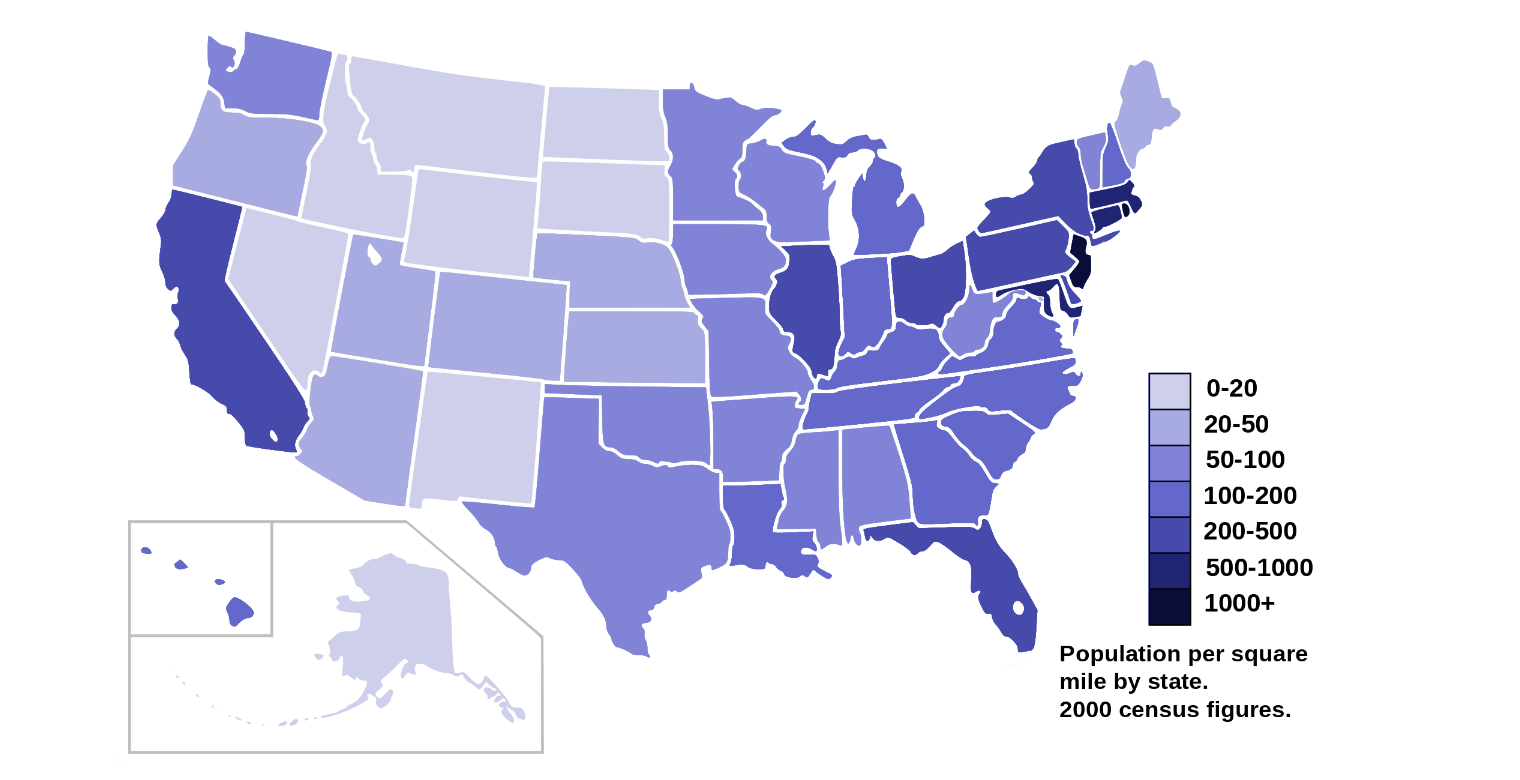

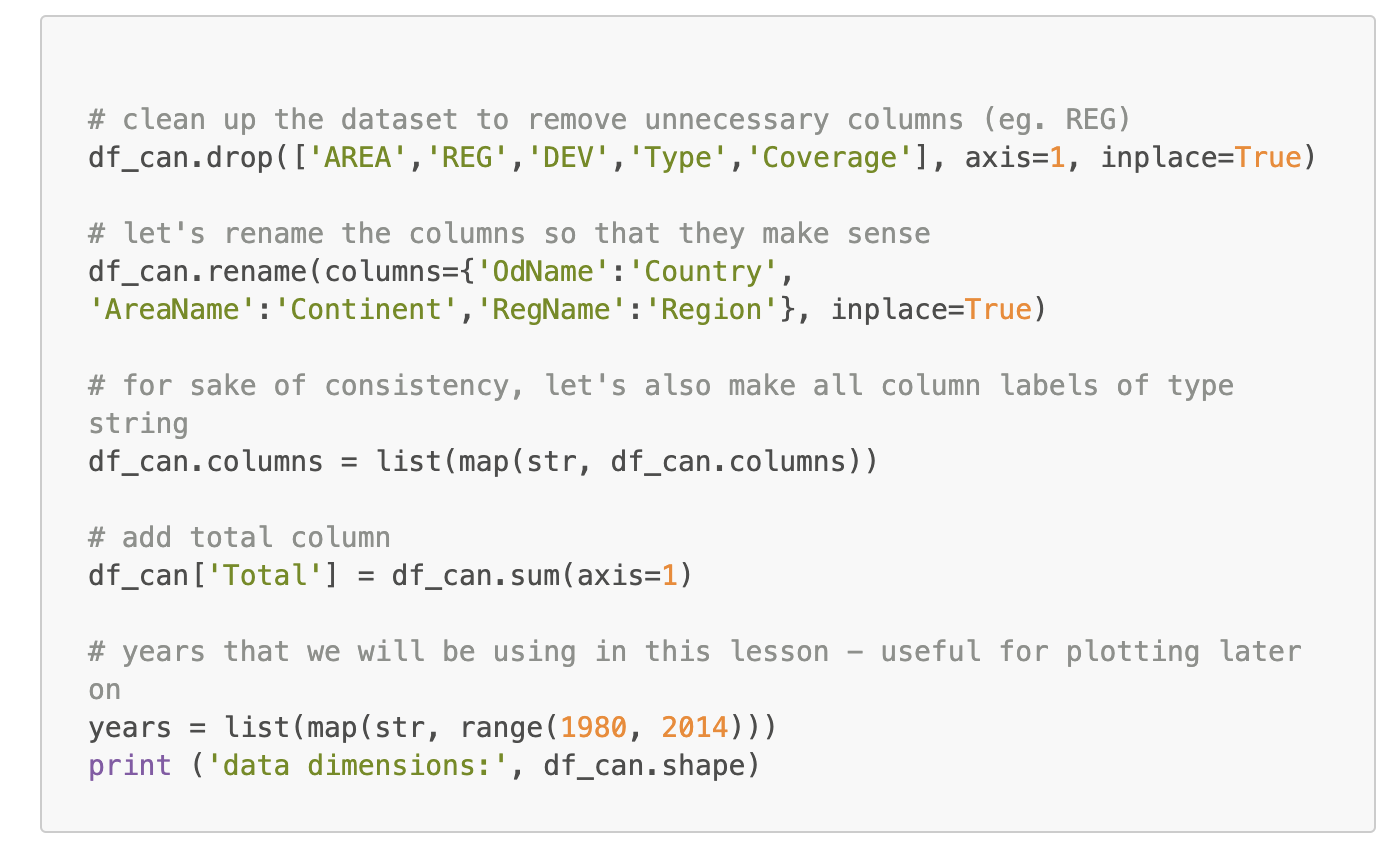

In [28]:
df_can = pd.read_csv(prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/df_can.csv')
df_can

,Unnamed: 0,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [29]:
df_can.shape

(195, 39)

In [30]:
df_can.rename(columns={'Unnamed: 0' : 'Country'}, inplace=True)
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [31]:
world_geo = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/world_countries.json'

In [33]:
world_map = folium.Map(location=[0,0],
                       zoom_start=2,
                       tiles= 'CartoDB positron'
                      )

In [34]:
world_map.choropleth(geo_data=world_geo,
                     data=df_can,
                     columns=['Country', 'Total'],
                     key_on='feature.properties.name',
                     fill_color='YlOrRd',
                     fill_opacity=.7,
                     line_opcity=.2,
                     legend_name='Immigration to Canada'
                    )

/Users/melawai.it/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [35]:
world_map